# NAME  : SEGU VENKATA AKHIL
# INTERN - Data Science & Business Analytics

# Predict the percentage of an student based on the no. of study hours.

In [1]:
#Importing the Libraries
import os
import pandas as pd
import seaborn  as sns
sns.set()
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\akhil\Downloads\TASK-1.csv")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.shape

(25, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Data Visualization

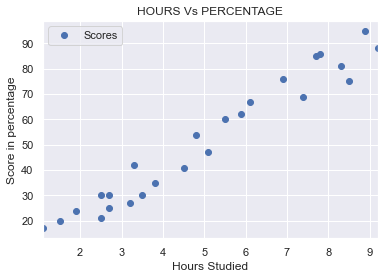

In [8]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('HOURS Vs PERCENTAGE')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score in percentage')  
plt.legend(['Scores'], loc='upper left')
plt.show()

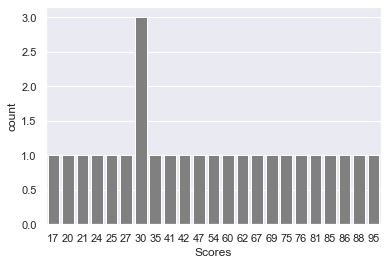

In [9]:
sns.countplot(x='Scores',data=data,color='Grey')

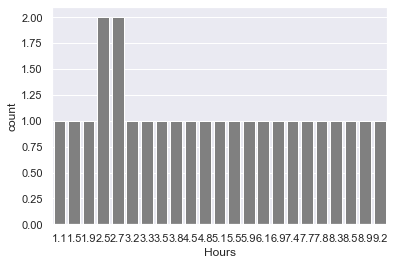

In [10]:
sns.countplot(x='Hours',data=data,color='grey')

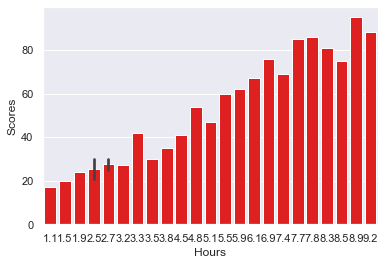

In [11]:
sns.barplot(x='Hours',y='Scores',data=data, color='red')

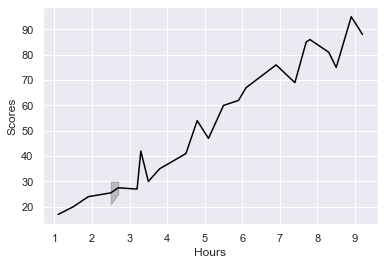

In [12]:
sns.lineplot(x = 'Hours', y = 'Scores', data = data,color='Black')

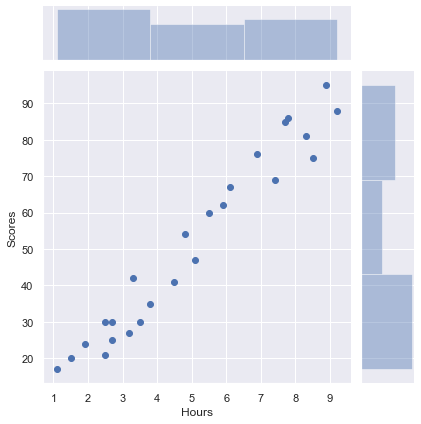

In [13]:
sns.jointplot(x = "Hours", y = "Scores", kind = "scatter", data = data)

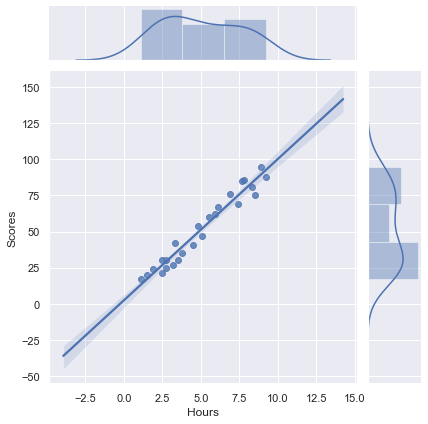

In [14]:
sns.jointplot(x = "Hours", y = "Scores", kind = "reg", data = data)

# Training The Data

In [15]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [16]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [17]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [19]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [20]:
Y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [21]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [22]:
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

# Fitting the Data

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print(lr.coef_)
print(lr.intercept_)

[9.91065648]
2.0181600414346974


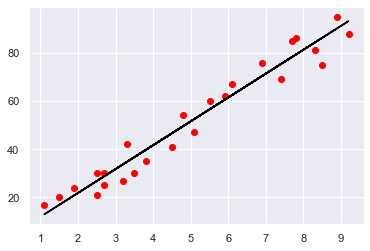

In [25]:
# Plotting for the test data
plt.scatter(X,y,color='red')
plt.plot(X, lr.coef_ * X + lr.intercept_, color = 'black');
plt.show()

# Predicting The Data

In [26]:
y_pred = lr.predict(X_test)
data = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


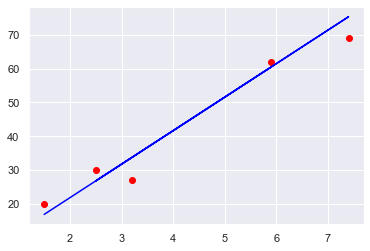

In [27]:
plt.scatter(X_test,Y_test,color = 'red')
plt.plot(X_test,y_pred,color = 'blue')


In [28]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
rmse = np.sqrt(mean_squared_error(Y_test,y_pred))
r2 = r2_score(Y_test,y_pred)
mae = mean_absolute_error(Y_test, y_pred)
print("Root mean square-Error:" + str(rmse))
print("R-squared value       :" + str(r2))
print("Mean Absolute Error   :" + str(mae))

Root mean square-Error:4.647447612100367
R-squared value       :0.9454906892105355
Mean Absolute Error   :4.183859899002975


In [29]:
Y_predict=lr.predict([[9.25]])
Y_predict

array([93.69173249])

### Predicted Score if a Student studies for 9.25 hrs a day is 93.7